In [ ]:
from bs4 import BeautifulSoup
import re
import unicodedata
import string
import langdetect
import requests
import os
import collections
import nltk
import numpy as np
import pandas as pd
import sklearn
from stop_words import get_stop_words
from gensim import corpora, models

In [ ]:
'''
def strip(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
'''

cat_counter = collections.Counter()
tags = ['description', 'keywords', 'og:title', 'og:description', 'twitter:title', 'twitter:description', 'DC.title', 'DC.description', 'DC.subject']

def clean_text(html):
    text = ' '

    titulos = html.find_all('title')
    for i, titulo in enumerate(titulos):
        text = titulo.getText().strip().lower()+text

    metas = html.find_all('meta')
    for i, meta in enumerate(metas):
        for tag in tags:
            if tag in meta.attrs.values():
                text = meta.attrs["content"].strip().lower()+' '+text

    # break into lines and remove leading and trailing space on each
    #lines = (line.strip().lower() for line in text.splitlines())

    # break into tokens
    tokens = (phrase.strip().strip(string.punctuation + string.digits) for phrase in text.split(" "))
    tokens_diff = list(set(tokens))
    # join text
    cleaned_text = ' '.join(token for token in tokens_diff if token)

    return cleaned_text


def get_clean_html(url, category):
    global cat_counter
    headers = {'User-agent': 'Mozilla/5.0'}
    timeout = (3.05, 10)

    try:
        try:
            r = requests.get(url=url, headers=headers, timeout=timeout)
            r.raise_for_status()

        except requests.exceptions.RequestException as e:    # This is the correct syntax
            with open("data/output/errors.txt", "a+") as myfile:
                myfile.write(url + '\t' + str(e) + '\n')
            print e

        else:
            soup = BeautifulSoup(r.content,"lxml")

            # kill all script and style elements
            for script in soup(["script", "style"]):
                script.extract()    # rip it out

            # get text
            text = soup.get_text()

            if len(text) < 10:
                with open("data/output/empty_webs.txt", "a+") as myfile:
                    myfile.write(url + '\t ' + text + '\n')
                print "OK"
                return

            lang = langdetect.detect(text)
            text = unicodedata.normalize('NFKD', text).encode('ascii','ignore')
            text = clean_text(soup)

            if text.count(" ") > 2:
                filename = "data/output/" + lang + "/" + re.sub('http://', '', url) + ".txt"
                if not os.path.exists(os.path.dirname(filename)):
                    os.makedirs(os.path.dirname(filename))
                with open(filename, 'w') as myfile:
                    myfile.write(text.encode('utf-8'))

                if lang == "es":
                    cat_counter[category] = cat_counter[category] + 1
            else:
                with open("data/output/short_webs.txt", "a") as myfile:
                    myfile.write(url + '\t ' + text + '\n')

            print "OK"

    except Exception as e:
        print "UNHANDLED ERROR: " + str(e)
        with open("data/output/errors.txt", "a+") as myfile:
                myfile.write(url + '\t"UNHANDLED ERROR: "' + str(e) + '\n')

def main():
    input_file = "data/test_set.csv"
    f_in = open(input_file, 'r')
    urls = (line.split('|')[0] for line in f_in)

    for line in f_in:
        url, cat = line.split('|')
        print url
        get_clean_html(url,cat)

    print cat_counter


main()

http://t.co
OK
http://4b.es
HTTPConnectionPool(host='4b.es', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000000009867550>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))
http://bl.uk
OK
http://op.fi
OK
http://sa.dk
OK
http://tk.de
OK
http://tu.tv
OK
http://ua.es
HTTPConnectionPool(host='ua.es', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000000000DB371D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))
http://up.pt
OK
http://uv.es
HTTPConnectionPool(host='uv.es', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000000000DB37208>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))
http://3m.com
OK
http://7ya.ru
OK
http://888.es
OK
h

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
#Técnica de factorización de la matriz no negativa (NMF) 

#input_file = "outFull.txt"
#doc_set = open(input_file, 'r')
CORPUS_PATH = os.path.join('data', 'output/es')
filenames = sorted([os.path.join(CORPUS_PATH, fn) for fn in os.listdir(CORPUS_PATH)])

In [ ]:
# compile sample documents into a list
#doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]
# create sample documents
input_file = "outFull" #+ i
doc_set = open(input_file, 'r')

# list for tokenized documents in loop
texts = []

In [ ]:
# create Spanish stop words list
lang = langdetect.detect(input_file)
lang_stop = get_stop_words('es')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
print lang_stop

In [85]:
# loop through document list
for i in doc_set:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in lang_stop]

    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    # add tokens to list
    texts.append(stemmed_tokens)
    
print tokens

['http', 'share2w', 'com', 'photo', 'app', 'share', 'restrict', 'video', 'fast', 'file', 'download', 'speed', 'network', 'transfer', 'send', 'also', 'music', 'free', 'fastest', 'super', 'shareapp', 'doc', 'etc', 'can', 'sharecloud', 'backup']


In [ ]:
print texts

In [87]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
print (dictionary.token2id)

{u'woodi': 9967, u'alcoholimetro': 7107, u'redzepi': 10464, u'sonja': 14255, u'nagusiaixa': 6164, u'isaia': 28081, u'caney': 5342, u'fitlen': 18082, u'igual': 10108, u'psicoleg': 24732, u'hermana': 7548, u'hermann': 726, u'hermano': 6589, u'canem': 26346, u'playcircl': 13237, u'gastara': 6687, u'transportemetropolitano': 25412, u'especificacion': 7335, u'wikiloc': 10315, u'dictado': 19003, u'capoeira': 27357, u'compuesta': 15124, u'compuesto': 7219, u'kasperski': 976, u'marxismo': 14146, u'elgal': 4256, u'pertenc': 24435, u'aludux': 16253, u'wolfcraft': 9961, u'asama': 7688, u'litiasisren': 18967, u'fuert': 3928, u'iluminacia3n': 6511, u'quinielista': 19899, u'usenet': 9764, u'dialogo': 10866, u'bibliografikoa': 19166, u'databank': 20321, u'widget': 4322, u'probabilidad': 14579, u'chine': 14845, u'china': 3861, u'cerniera': 16314, u'chino': 5284, u'diputacionavila': 3912, u'kidz': 13739, u'natureo': 19611, u'climber': 11225, u'golden': 5563, u'vaporizador': 27462, u'mundochollo': 13935

In [88]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=20)
listDicTopics = []
#dicTopic = dict()
for i in ldamodel.show_topics(len(dictionary)):
    print i
    dicTopic = {i[0]:i[1].rstrip().split('+')}
    listDicTopics.append(dicTopic)
    
#print(corpus[0])

(0, u'0.030*"http" + 0.007*"bicicleta" + 0.003*"apoyo" + 0.003*"valencia" + 0.003*"bici" + 0.003*"f" + 0.003*"ua" + 0.003*"montana" + 0.003*"puerta" + 0.003*"m"')
(1, u'0.047*"http" + 0.017*"venta" + 0.016*"alquil" + 0.012*"coch" + 0.011*"malaga" + 0.009*"espana" + 0.008*"barcelona" + 0.008*"casa" + 0.007*"piso" + 0.007*"industri"')
(2, u'0.028*"http" + 0.012*"dominio" + 0.011*"host" + 0.010*"servidor" + 0.007*"web" + 0.007*"clinica" + 0.007*"abogado" + 0.006*"leon" + 0.006*"alojamiento" + 0.006*"madrid"')
(3, u'0.044*"http" + 0.042*"tienda" + 0.038*"onlin" + 0.023*"precio" + 0.019*"mejor" + 0.017*"comprar" + 0.013*"oferta" + 0.011*"espana" + 0.011*"barato" + 0.010*"ropa"')
(4, u'0.035*"http" + 0.009*"seguro" + 0.007*"salud" + 0.007*"espana" + 0.006*"descubr" + 0.005*"gama" + 0.005*"servicio" + 0.005*"producto" + 0.005*"ofrec" + 0.004*"amplia"')
(5, u'0.070*"http" + 0.049*"com" + 0.034*"blogspot" + 0.015*"blog" + 0.013*"noticia" + 0.010*"libro" + 0.008*"web" + 0.007*"actualidad" + 0.00

In [47]:
#list
word_topics = []
temp = []
dictList = []

for dicTopic in listDicTopics:
    for k,v in dicTopic.items():
        print "Topic #%s ->"%(k)
        for x in v:
            word_topics.append(x.split('*'))
            temp = [k,word_topics]
            #dictList.append(temp)
            print "%s"%(x)

Topic #0 ->
0.055*"http" 
 0.012*"espana" 
 0.007*"web" 
 0.007*"inicio" 
 0.006*"club" 
 0.006*"perro" 
 0.006*"federacion" 
 0.006*"ofici" 
 0.005*"deport" 
 0.005*"futbol"
Topic #1 ->
0.044*"http" 
 0.028*"tienda" 
 0.024*"onlin" 
 0.015*"precio" 
 0.015*"mejor" 
 0.009*"comprar" 
 0.008*"venta" 
 0.008*"oferta" 
 0.008*"accesorio" 
 0.008*"producto"
Topic #2 ->
0.089*"http" 
 0.087*"com" 
 0.052*"blogspot" 
 0.012*"blog" 
 0.010*"energia" 
 0.005*"solar" 
 0.004*"uva" 
 0.004*"grupo" 
 0.004*"renov" 
 0.004*"energetica"
Topic #3 ->
0.040*"http" 
 0.027*"informacion" 
 0.025*"venta" 
 0.016*"pagina" 
 0.016*"mejor" 
 0.015*"encontrara" 
 0.015*"gener" 
 0.013*"recurso" 
 0.013*"busca" 
 0.013*"fuent"
Topic #4 ->
0.022*"http" 
 0.004*"financiero" 
 0.004*"invers" 
 0.004*"europ" 
 0.003*"ugr" 
 0.003*"seo" 
 0.003*"registro" 
 0.003*"cama" 
 0.003*"fondo" 
 0.003*"prestamo"
Topic #5 ->
0.039*"http" 
 0.017*"alquil" 
 0.014*"coch" 
 0.009*"casa" 
 0.009*"espana" 
 0.008*"venta" 
 0.00

In [80]:
df = pd.DataFrame(temp[1], columns=['Score','Word'])
df.head()

,Score,Word
0,0.055,"""http"""
1,0.012,"""espana"""
2,0.007,"""web"""
3,0.007,"""inicio"""
4,0.006,"""club"""


In [94]:
#Técnica de factorización de la matriz no negativa (NMF) 
#input_file = "outFull.txt"
#doc_set = open(input_file, 'r')
CORPUS_PATH = os.path.join('data', 'output/es')
filenames = sorted([os.path.join(CORPUS_PATH, fn) for fn in os.listdir(CORPUS_PATH)])
print(filenames)

['data\\output/es\\365imagenesbonitas.com.txt', 'data\\output/es\\4fotos1palabrarespuestas.net.txt', 'data\\output/es\\abc.gov.ar.txt', 'data\\output/es\\adnriver.com.txt', 'data\\output/es\\ahba.com.ar.txt', 'data\\output/es\\aldeaviral.com.txt', 'data\\output/es\\alesanderlopez.es.txt', 'data\\output/es\\amodil.com.txt', 'data\\output/es\\andorrafreemarket.com.txt', 'data\\output/es\\anthenaarcturus.com.txt', 'data\\output/es\\arandu.com.ar.txt', 'data\\output/es\\arenamarybosque.com.ar.txt', 'data\\output/es\\argentas.com.ar.txt', 'data\\output/es\\arredo.com.ar.txt', 'data\\output/es\\bancoprovincia.com.ar.txt', 'data\\output/es\\berissociudad.com.ar.txt', 'data\\output/es\\besha.com.ar.txt', 'data\\output/es\\bigbangnews.com.txt', 'data\\output/es\\brandlive.net.txt', 'data\\output/es\\buenosaires.gob.ar.txt', 'data\\output/es\\buscapalabras.com.ar.txt', 'data\\output/es\\carestino.com.txt', 'data\\output/es\\carlosdodorico.com.txt', 'data\\output/es\\cba24n.com.ar.txt', 'data\\ou

In [96]:
input_file = "outFull.txt"
doc_set = open(input_file, 'r')
print(input_file)

outFull.txt


In [93]:
# files are located in data/datos

len(filenames)
filenames[:5]

#Por analogía con LDA, utilizaremos NMF para obtener una matriz de documentos relacionados con el
#tema (temas aquí también se conocen como "componentes") y una lista de los mejores palabras para cada tema.
#clara analogía con los mismos nombres de variables: doctopicytopic_words
import sklearn.feature_extraction.text as text

#lang = langdetect.detect(CORPUS_PATH)
lang_stop = get_stop_words('es')
vectorizer = text.CountVectorizer(input='filename', stop_words=lang_stop, min_df=20)
dtm = vectorizer.fit_transform(filenames).toarray()
vocab = np.array(vectorizer.get_feature_names())

dtm.shape

from sklearn import decomposition
num_topics = 20
num_top_words = 20
clf = decomposition.NMF(n_components=num_topics, random_state=1)

# this next step may take some time

doctopic = clf.fit_transform(dtm)

# Palabras asociadas a temas 
topic_words = []

for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])
    
doctopic = (doctopic / (np.sum(doctopic, axis=1, keepdims=True)))

#promedio de las acciones de temas asociados con el mismo documento
doc_names = []

for fn in filenames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    doc_names.append(name) 

# turn this into an array so we can use NumPy functions
doc_names = np.asarray(doc_names)
print(doc_names)

doctopic_orig = doctopic.copy()

# use method described in preprocessing section
num_groups = len(set(doc_names))

doctopic_grouped = np.zeros((num_groups, num_topics))

for i, name in enumerate(sorted(set(doc_names))):
     doctopic_grouped[i, :] = np.mean(doctopic[doc_names == name, :], axis=0) 

doctopic = doctopic_grouped

#Inspecting the NMF fit
docs = sorted(set(doc_names))

['365imagenesbonitas.com' '4fotos1palabrarespuestas.net' 'abc.gov.ar'
 'adnriver.com' 'ahba.com.ar' 'aldeaviral.com' 'alesanderlopez.es'
 'amodil.com' 'andorrafreemarket.com' 'anthenaarcturus.com' 'arandu.com.ar'
 'arenamarybosque.com.ar' 'argentas.com.ar' 'arredo.com.ar'
 'bancoprovincia.com.ar' 'berissociudad.com.ar' 'besha.com.ar'
 'bigbangnews.com' 'brandlive.net' 'buenosaires.gob.ar'
 'buscapalabras.com.ar' 'carestino.com' 'carlosdodorico.com'
 'cba24n.com.ar' 'ceacsrl.com.ar' 'cfkargentina.com' 'chinchonfree.com'
 'chochox.com' 'cholilaonline.com' 'claroapps.com' 'clinica-web.com.ar'
 'comocultivo.com' 'comoorganizarlacasa.com' 'consejosdederecho.com.ar'
 'coopelecpehuajo.com.ar' 'crecerfeliz.es' 'cristianarce.com.ar'
 'cutralcoalinstante.com' 'deruedas.com.ar' 'diariofemenino.com'
 'diariosargentinos.net' 'eavescueladevinos.com' 'elchubut.com.ar'
 'eldestapeweb.com' 'elpatagonico.com' 'elrealista.com' 'elsol.com.ar'
 'eltallerdeloantiguo.com' 'eroadvertising.com' 'escortsxp.com'

In [90]:
print("Top NMF topics in...")

for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(docs[i], top_topics_str))

Top NMF topics in...
365imagenesbonitas.com: 19 18 1
4fotos1palabrarespuestas.net: 19 18 1
abc.gov.ar: 19 18 1
adnriver.com: 9 0 7
ahba.com.ar: 19 18 1
aldeaviral.com: 7 10 19
alesanderlopez.es: 19 18 1
amodil.com: 19 18 1
andorrafreemarket.com: 19 18 7
anthenaarcturus.com: 19 18 1
arandu.com.ar: 10 17 3
arenamarybosque.com.ar: 19 18 1
argentas.com.ar: 16 10 19
arredo.com.ar: 17 10 3
bancoprovincia.com.ar: 19 18 1
berissociudad.com.ar: 0 5 3
besha.com.ar: 19 18 1
bigbangnews.com: 0 9 3
brandlive.net: 18 7 13
buenosaires.gob.ar: 10 17 3
buscapalabras.com.ar: 19 18 1
carestino.com: 19 18 1
carlosdodorico.com: 19 18 1
cba24n.com.ar: 0 5 3
ceacsrl.com.ar: 19 18 1
cfkargentina.com: 19 17 10
chinchonfree.com: 18 13 14
chochox.com: 4 8 1
cholilaonline.com: 0 13 18
claroapps.com: 19 18 1
clinica-web.com.ar: 10 17 3
comocultivo.com: 19 7 10
comoorganizarlacasa.com: 19 18 1
consejosdederecho.com.ar: 5 3 17
coopelecpehuajo.com.ar: 19 18 1
crecerfeliz.es: 19 18 1
cristianarce.com.ar: 19 18 1
cutra

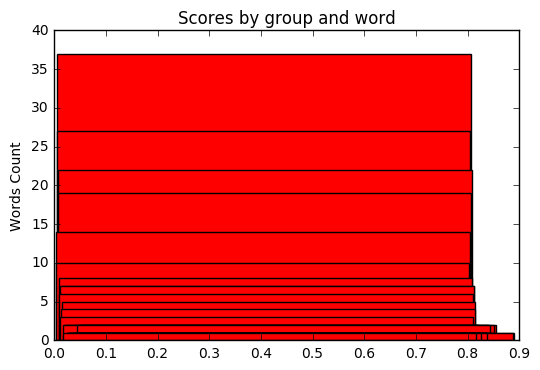

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
  
p1 = plt.bar(df.Score.value_counts().index, df.Score.value_counts(), color='r')
plt.ylabel('Words Count')
plt.title('Scores by group and word')

plt.show()